In [97]:
#libraries
import random
import numpy as np
from scipy.integrate import solve_ivp
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator



In [98]:
#general constants
g = 9.81
rocketDragCoef = 0.4
crossSectArea= 0.028
mInitial = 20
airBrakeCoeff = 2
airBrakeCrossSect = 0.015
rho_0 =  1.225
e = 2.718281828459045


In [99]:
#air density data
rawAirDensity = np.loadtxt(r"..\rocketData\air_density.csv", delimiter=',')  # Adjust skiprows based on your file's structure
airDensePoints = rawAirDensity.transpose()
#airDenseFunc = interpolate.CubicSpline(airDensePoints[0], airDensePoints[1])
a = 1.00367
b = -0.000101227
c = -0.000293537


def airDenseFunc(y):
    return a * e**(b*y)

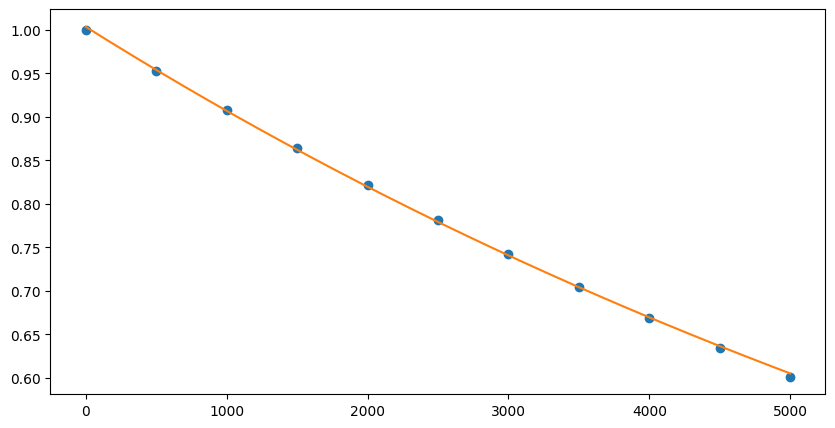

In [100]:
height =  np.linspace(0, 5000,5000)
sampleAirDensity = airDenseFunc(height)

plt.figure(figsize=(10,5))
plt.plot(airDensePoints[0], airDensePoints[1], 'o', label='Data Points')
plt.plot(height,sampleAirDensity)
plt.show()

In [101]:
#thrust data 
rawThrust = np.loadtxt(r'..\rocketData\thrust_curve.csv', delimiter=',')  # Adjust skiprows based on your file's structure
thrustPoints = rawThrust.transpose()
thrustFunc = interpolate.Akima1DInterpolator(thrustPoints[0], thrustPoints[1])

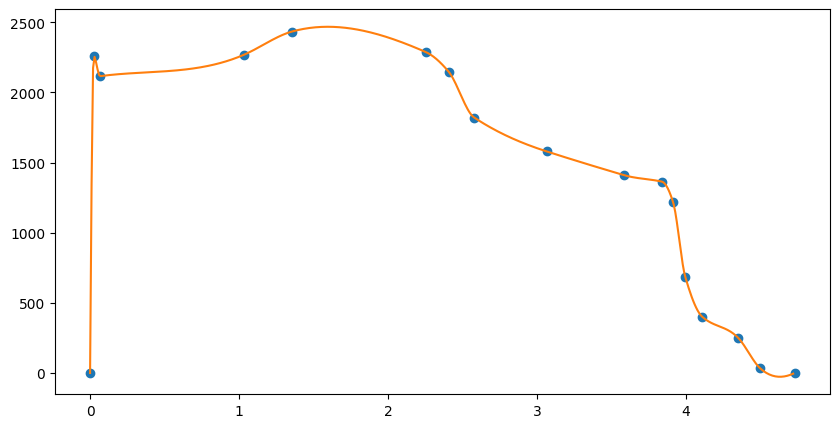

In [102]:
time =  np.linspace(0, 5, 500)
sampleThrust = thrustFunc(time)

plt.figure(figsize=(10,5))
plt.plot(thrustPoints[0], thrustPoints[1], 'o', label='Data Points')
plt.plot(time,sampleThrust)
plt.show()

In [103]:
#thrust curve 
def thrust(t):
    if t >= 0 and t <= 4.729:
        return thrustFunc(t)
    else:
        return 0 

In [104]:
#air density as a function of altitude 
def air_density(y):
    if (y >= 0 and y <= 5000):
        return rho_0 * airDenseFunc(y)
    
    elif():
        return

    else:
        return 0

In [105]:
def mass(t):
    burnRate = 3.717/4.5
    if t >= 0 and t <= 4.5:
        return mInitial - burnRate * t
    else:
        return mInitial - 3.717

In [106]:
#rocket drag given by velocity and height
def rocket_drag(v,y):
    rho = air_density(y)
    return 0.5 * rho * v**2 * rocketDragCoef * crossSectArea * ((v > 0)*2 - 1)

In [107]:
def air_brake_drag(v,y,theta):
    rho = air_density(y)
    if 0 <= theta <= 1:
        return 0.5 * rho * v**2 * airBrakeCoeff * (airBrakeCrossSect * theta) * ((v > 0)*2 - 1)
    else:
        return 0

In [127]:
def dynamic_equations(t,state):
    theta = 0.0
    altitude, v = state
    m = mass(t)
    T = thrust(t)
    D = rocket_drag(v, altitude)
    Dab= air_brake_drag(v,altitude,theta)
    dvdt = (T-D-Dab-m*g)/m
    dydt = v
    return np.array([dydt, dvdt])

In [134]:
def rk4_2ndOrder(func,t0,initState,dt):
    
    k1 = dt * func(t0, initState)
    k2 = dt * func(t0+(0.5*dt), initState +(0.5*dt)*k1)
    k3 = dt * func(t0+(0.5*dt), initState +(0.5*dt)*k2)
    k4 = dt * func(t0+(dt), initState +(dt)*k3)

    ynext = initState+ (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)

    return np.array(ynext)

In [129]:
# Initial conditions
initial_altitude = 0
initial_velocity = 0
state = np.array([initial_altitude, initial_velocity])
dt = 0.01  # Time step
total_time = 100  # Total simulation time in seconds

# Lists to store the results
time_history = []
altitude_history = []
velocity_history = []


In [130]:
for t in np.arange(0, total_time, dt):
    current_altitude = state[0]
    state = rk4_2ndOrder(dynamic_equations, t, state, dt)
    
    # Store the results
    time_history.append(t)
    altitude_history.append(state[0])
    velocity_history.append(state[1])


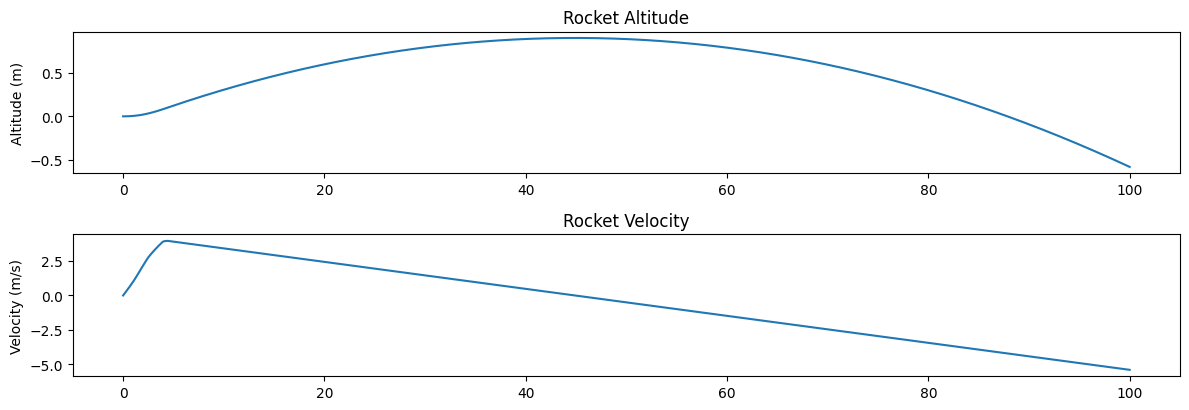

In [131]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(time_history, altitude_history)
plt.title('Rocket Altitude')
plt.ylabel('Altitude (m)')

plt.subplot(3, 1, 2)
plt.plot(time_history, velocity_history)
plt.title('Rocket Velocity')
plt.ylabel('Velocity (m/s)')

plt.tight_layout()
plt.show()

In [115]:
def solve_ode(func,t0,y0,dt,T):
    #tragectory 
    num_time_pts = int(T/dt)
    #t is the time step array
    t_values = np.linspace(0,T,num_time_pts)

    y_values = np.zeros((num_time_pts, len(y0)))

    y_values[0]=y0

    for i in range(1,num_time_pts-1):
        y_values[i] = rk4singlestep(func,t0,y0,dt)

    return t_values, y_values

In [116]:
# Initial conditions and parameters
y0 = [0, 0]  # Initial displacement (0) and initial velocity (100 m/s)
t0 = 0  # Initial time
dt = 0.01  # Time step
T = 10  # Final time

In [117]:
t_values, y_values = solve_ode(dynamic_equations, t0, y0, dt, T)


In [118]:
for t, y in zip(t_values, y_values):
    print(f"t = {t:.2f}, displacement = {y[0]:.2f}, velocity = {y[1]:.2f}")

t = 0.00, displacement = 0.00, velocity = 0.00
t = 0.01, displacement = 0.00, velocity = 0.00
t = 0.02, displacement = 0.00, velocity = 0.00
t = 0.03, displacement = 0.00, velocity = 0.00
t = 0.04, displacement = 0.00, velocity = 0.00
t = 0.05, displacement = 0.00, velocity = 0.00
t = 0.06, displacement = 0.00, velocity = 0.00
t = 0.07, displacement = 0.00, velocity = 0.00
t = 0.08, displacement = 0.00, velocity = 0.00
t = 0.09, displacement = 0.00, velocity = 0.00
t = 0.10, displacement = 0.00, velocity = 0.00
t = 0.11, displacement = 0.00, velocity = 0.00
t = 0.12, displacement = 0.00, velocity = 0.00
t = 0.13, displacement = 0.00, velocity = 0.00
t = 0.14, displacement = 0.00, velocity = 0.00
t = 0.15, displacement = 0.00, velocity = 0.00
t = 0.16, displacement = 0.00, velocity = 0.00
t = 0.17, displacement = 0.00, velocity = 0.00
t = 0.18, displacement = 0.00, velocity = 0.00
t = 0.19, displacement = 0.00, velocity = 0.00
t = 0.20, displacement = 0.00, velocity = 0.00
t = 0.21, dis

In [ ]:
# PID control function
def pid_controller(Kp,Ki,Kd,setpoint, actual, prevError, integral, dt):
    error = actual - setpoint
    integral = error * dt
    derivative = (error - prevError)/dt

    # print(error, integral, derivative)
    output =  Kp * error + Ki * integral + Kd * derivative
    return output, error, integral

In [ ]:
def estimate_apogee(currentTime, currentState, deployment, dt):
    solution = solve_ivp(dynamic_equations, [currentTime, currentTime + dt], currentState, args= (deployment,), t_eval=np.linspace(currentTime, currentTime + dt,30))
    return solution.y.max() + (np.random.rand())

In [ ]:
def simulation(Kp,Ki,Kd,desired_apogee,noise,estimate_apogee_rate):
    # Initial conditions
    y0 = [0, 0]  # initial altitude and velocity
    t_span = (0, 40)  # time span for the simulation
    steps = 1200
    estimated_apogee = 0

    integral = 0
    prevError = 0
    deployment = 0
    deployment_factor = 0.3 # constant- represents # deployments per second

    # Time points for output
    tPoints = np.linspace(t_span[0], t_span[1], steps) 

    #the objective is to have 3 arrays with altitude with respect to time, velocity with respect to time and air brake deployment with respect to time
    # run the simulation with the PID control system
    altitude = []
    velocity = []
    deploymentVals = [] 
    for i in range(0,len(tPoints)):
        currentTime = tPoints[i]
        if i == 0:
            currentState = y0
            dt = tPoints[1]-tPoints[0]
        else:
            dt = tPoints[i] - tPoints[i-1]
            
        if (i % (steps/(t_span[1]*estimate_apogee_rate)) == 0):
            estimated_apogee = estimate_apogee(currentTime, currentState, deployment, 15, noise) # max apogee in next 15s
        
        deployment_rate, prevError, integral = pid_controller(Kp,Ki,Kd,desired_apogee,estimated_apogee, prevError, integral, dt)

        deployment_rate = max(-1*deployment_factor,min(deployment_rate,deployment_factor))
        d_deployment = deployment_rate*dt # deployments/s * s
        deployment += d_deployment 

        deployment = max(-1,min(deployment,1))

        # control logic- only after burnout (also before apogee but not as necessary)
        #                also only under mach 0.8
        if (currentTime < 4.5 or currentState[1] > 275):
            deployment = 0
            
        # print(f"Time: {currentTime}, Deployment Length: {deployment}, Deployment Rate: {deployment_rate}, Estimated Apogee: {estimated_apogee}, Altitude: {currentState[0]}, Velocity: {currentState[1]}")
        

        solution = solve_ivp(dynamic_equations, [currentTime, currentTime + dt], currentState, args= (deployment,), t_eval= [currentTime + dt])

        currentState = np.array(solution.y[:,-1])

        # Set velocity to zero if altitude is zero or below
        if currentState[0] <= 0:
            currentState[0] = 0
            currentState[1] = 0

        # Store the results
        altitude.append(currentState[0])
        velocity.append(currentState[1])
        deploymentVals.append(deployment)

    return tPoints, altitude, velocity, deploymentVals


In [ ]:
#simulation parameters
desired_apogee = 2500
Kp = 0.001
Ki = 0.1
Kd = 0

noise = 20
seconds_per_estimation = 0.5


uc_tPoints, uc_altitude, uc_velocity, uc_deploymentVals = simulation(0,0,0,desired_apogee,noise,seconds_per_estimation)

tPoints, altitude, velocity, deploymentVals = simulation(Kp,Ki,Kd,desired_apogee,noise, seconds_per_estimation)

maxHeight = max(altitude)

uc_maxHeight = max(uc_altitude)



print(maxHeight,uc_maxHeight)


NameError: name 'n_sims' is not defined

In [ ]:
#simulation parameters
desired_apogee = 2500
Kp = 0.001
Ki = 0.1
Kd = 0

n_sims = 500
noise = 100

heights = np.zeros(n_sims)

uc_tPoints, uc_altitude, uc_velocity, uc_deploymentVals = simulation(0,0,0,desired_apogee,noise)

for i in range(0,n_sims):
    tPoints, altitude, velocity, deploymentVals = simulation(Kp,Ki,Kd,desired_apogee)

    maxHeight = max(altitude)
    heights[i]= maxHeight

uc_maxHeight = max(uc_altitude)



print(maxHeight,uc_maxHeight)
print(maxVel, uc_maxVel)
plt.hist(heights)


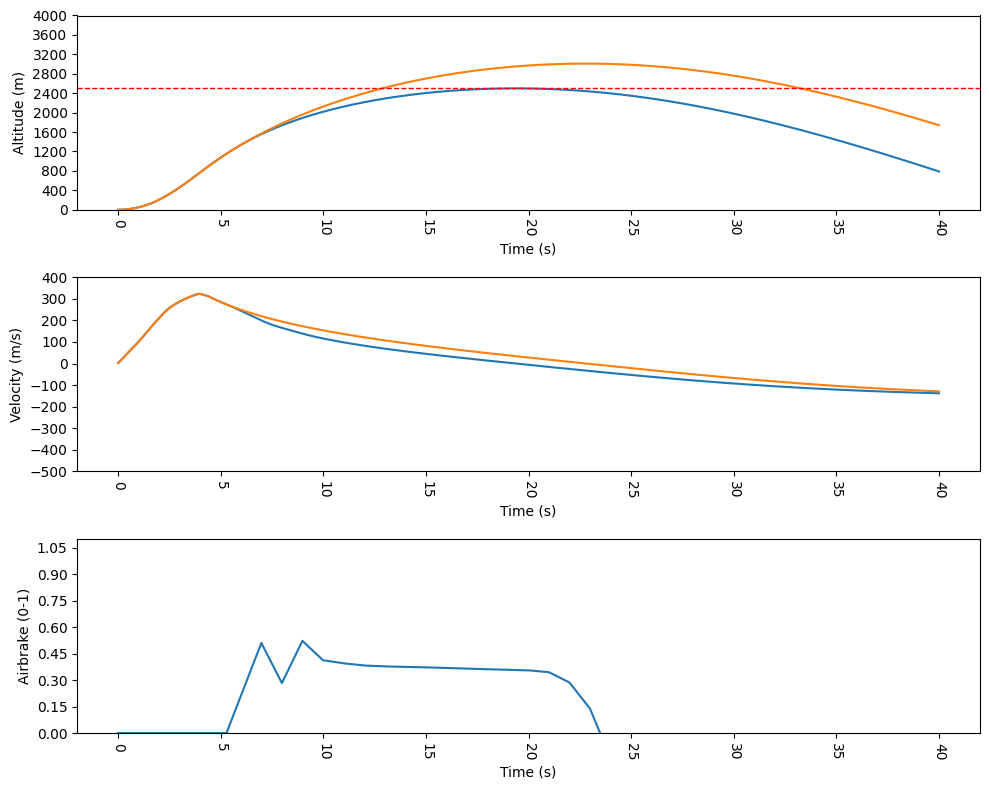

In [ ]:
# Plotting results
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Altitude subplot
axs[0].plot(tPoints, altitude)
axs[0].plot(tPoints, uc_altitude)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Altitude (m)')
axs[0].set_ylim(0, 4000)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
axs[0].yaxis.set_major_locator(MaxNLocator(nbins=10))
axs[0].tick_params(axis='x', rotation=-90)



#desired apogee
axs[0].axhline(y=desired_apogee, color='r', linestyle='--', linewidth=1)



# Velocity subplot
axs[1].plot(tPoints, velocity)
axs[1].plot(tPoints, uc_velocity)
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Velocity (m/s)')
axs[1].set_ylim(-500, 400)
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
axs[1].yaxis.set_major_locator(MaxNLocator(nbins=10))
axs[1].tick_params(axis='x', rotation=-90)

# Airbrake deployment subplot
axs[2].plot(tPoints, deploymentVals)
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Airbrake (0-1)')
axs[2].set_ylim(0, 1.1)
axs[2].xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
axs[2].yaxis.set_major_locator(MaxNLocator(nbins=10))
axs[2].tick_params(axis='x', rotation=-90)

# Adjust layout to make room for x-axis labels
plt.tight_layout()

# Display the plot
plt.show()
